In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 한글 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='retina')
sns.set(font='retina')
mpl.rc('axes', unicode_minus=False)

In [21]:
ipo_df = pd.read_csv("C:/Users/Edward/Desktop/PythonWorkspace/IPO.csv", encoding='cp949')
ipo_df.head(3)

신규상장일        기업명    공모가   시초가   첫날종가  희망공모가_하한  희망공모가_상한  확정공모가  \
0  2022-11-18         엔젯  10000  9000  10850     12000     15200  10000   
1  2022-11-18        유비온   2000  1850   1745      1800      2000   2000   
2  2022-11-17  티쓰리엔터테인먼트   1700  2445   2085      1500      1700   1700   

     기관경쟁률    청약경쟁률  ...  순이익(백만원)  자본금(백만원)  시장구분  의무보유확약비율  구주매출비율  신주매출비율  \
0    42.15     1.86  ...    -29867      5258   코스닥      6.00     0.0   100.0   
1   736.72    57.80  ...      1441      1971   코스닥      1.11     0.0   100.0   
2  1744.08  1384.30  ...     10106      6558   코스닥      4.03     0.0   100.0   

   종속변수          주간사  주간사 2개 이상  주간사 규모  
0     0  미래에셋증권 주식회사          0       0  
1     0  미래에셋증권 주식회사          0       0  
2     0  미래에셋증권 주식회사          0       0  

[3 rows x 25 columns]

## 데이터 확인

In [22]:
print("\n ### 학습 데이터 정보 ###  \n")
print(ipo_df.info())


 ### 학습 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신규상장일      599 non-null    object 
 1   기업명        599 non-null    object 
 2   공모가        599 non-null    int64  
 3   시초가        599 non-null    int64  
 4   첫날종가       599 non-null    int64  
 5   희망공모가_하한   599 non-null    int64  
 6   희망공모가_상한   599 non-null    int64  
 7   확정공모가      599 non-null    int64  
 8   기관경쟁률      599 non-null    float64
 9   청약경쟁률      599 non-null    float64
 10  총공모주식수     599 non-null    int64  
 11  신주모집       599 non-null    int64  
 12  구주매출       599 non-null    int64  
 13  공모금액(백만원)  599 non-null    int64  
 14  매출액(백만원)   599 non-null    int64  
 15  순이익(백만원)   599 non-null    int64  
 16  자본금(백만원)   599 non-null    int64  
 17  시장구분       599 non-null    object 
 18  의무보유확약비율   599 non-null    float64
 19  구주매출비율     599 non-null    

## 데이터 전처리

### 불필요 변수 제거

In [23]:
ipo_df.drop(['신규상장일', '기업명', '시초가', '첫날종가', '확정공모가', '주간사 2개 이상', '주간사 규모'], axis=1, inplace=True)

### 문자열 변수 확인

In [24]:
print(" 시장구분 값 분포:\n", ipo_df["시장구분"].value_counts())
print(" \n 주간사 값 분포:\n", ipo_df["주간사"].value_counts())

 시장구분 값 분포:
 코스닥    523
거래소     76
Name: 시장구분, dtype: int64
 
 주간사 값 분포:
 한국투자증권         121
미래에셋증권 주식회사    107
NH투자증권          88
대신증권주식회사        49
KB증권주식회사        42
키움증권(주)         41
하나금융투자주식회사      34
삼성증권(주)         28
신한금융투자 주식회사     25
신영증권주식회사        15
IBK투자증권         14
DB금융투자주식회사      11
유진투자증권주식회사       7
현대차증권주식회사        7
교보증권(주)          5
유안타증권주식회사        2
하이투자증권(주)        1
SK증권주식회사         1
케이프투자증권          1
Name: 주간사, dtype: int64


### 문자열 변수 가공

In [25]:
ipo_df.groupby(['시장구분','종속변수'])['종속변수'].count()

시장구분  종속변수
거래소   0        62
      1        14
코스닥   0       421
      1       102
Name: 종속변수, dtype: int64

## 데이터 EDA

<AxesSubplot:xlabel='시장구분', ylabel='종속변수'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45797 (\N{HANGUL SYLLABLE DAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figu

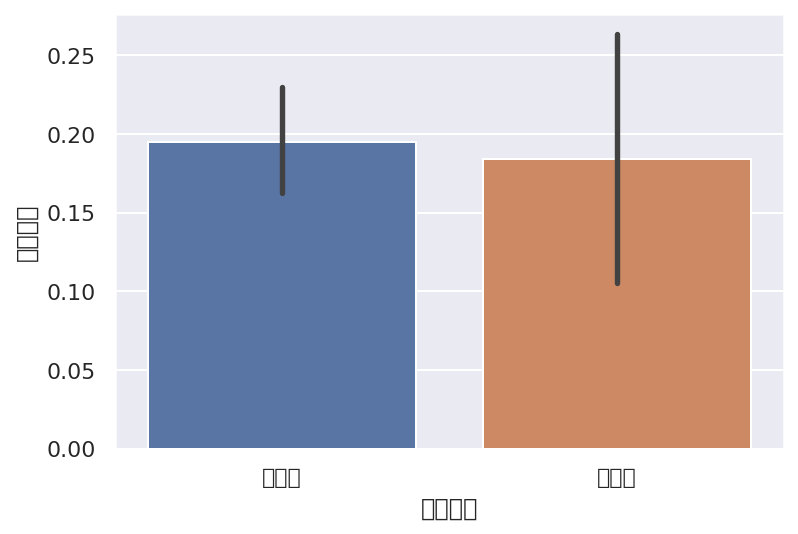

In [26]:
sns.barplot(x = '시장구분', y = '종속변수', data = ipo_df)

<AxesSubplot:xlabel='주간사', ylabel='종속변수'>

c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Edward\anaconda3\envs\py\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figu

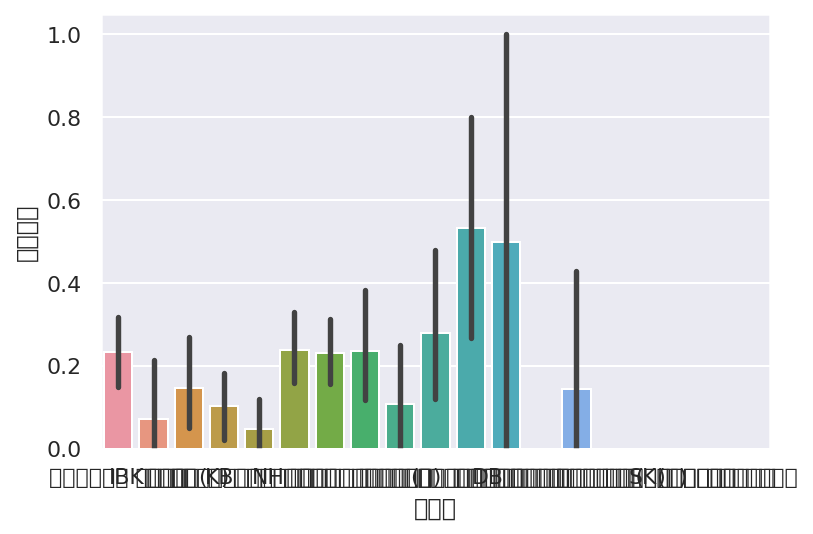

In [27]:
sns.barplot(x = '주간사', y = '종속변수', data = ipo_df)

### 라벨 인코딩

In [28]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['시장구분', '주간사']
  for feature in features:
    le = LabelEncoder( )
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

ipo_df = encode_features(ipo_df)
ipo_df.head()

공모가  희망공모가_하한  희망공모가_상한    기관경쟁률    청약경쟁률    총공모주식수      신주모집    구주매출  \
0  10000     12000     15200    42.15     1.86   2100000   2100000       0   
1   2000      1800      2000   736.72    57.80   2760000   2760000       0   
2   1700      1500      1700  1744.08  1384.30  17000000  17000000       0   
3  10500      9000     10500  1295.18    87.78   2700000   2300000  400000   
4  49000     53000     62000    67.49     1.73   1994762   1695548  299214   

   공모금액(백만원)  매출액(백만원)  순이익(백만원)  자본금(백만원)  시장구분  의무보유확약비율  구주매출비율  신주매출비율  \
0      21000     10055    -29867      5258     1      6.00    0.00  100.00   
1       5520     28067      1441      1971     1      1.11    0.00  100.00   
2      28900     68666     10106      6558     1      4.03    0.00  100.00   
3      28350     71969      9849      1138     1      5.30   14.81   85.19   
4      97743     75894     -2915       797     1      0.14   15.00   85.00   

   종속변수  주간사  
0     0    7  
1     0    7  
2     0    7  
3     0    1  
4     0    7

## 데이터 분리

In [29]:
y_ipo_df = ipo_df['종속변수']
X_ipo_df = ipo_df.drop('종속변수', axis=1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X_ipo_df, y_ipo_df, test_size = 0.3, random_state = 11)

## 모델링

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜포, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegressionClassifier 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegressionClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7778
RandomForestClassifier 정확도:0.8000
LogisticRegressionClassifier 정확도:0.8056


## 교차 검증

In [32]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits = folds)
  scores = []

  # KFold 교차검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_ipo_df)):
    # X_ipo_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_ipo_df.values[train_index], X_ipo_df.values[test_index]
    y_train, y_test = y_ipo_df.values[train_index], y_ipo_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7333
교차 검증 1 정확도: 0.6500
교차 검증 2 정확도: 0.8333
교차 검증 3 정확도: 0.8250
교차 검증 4 정확도: 0.8403
평균 정확도: 0.7764


In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_ipo_df, y_ipo_df, cv= 5)

for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7167
교차 검증 1 정확도: 0.7833
교차 검증 2 정확도: 0.7917
교차 검증 3 정확도: 0.7833
교차 검증 4 정확도: 0.7143
평균 정확도: 0.7579


## 그리드서치

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv= 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTressClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8473
테스트 세트에서의 DecisionTressClassifier 정확도 : 0.7889
